In [1]:
# спочатку song_listened
import pandas as pd

path_to_train = './data/train.csv'

cols = ['context_type', 'media_duration', 'user_gender', 'user_age']

train = pd.read_csv(path_to_train, encoding='utf-8', usecols=cols+['listen_type', 'ts_listen', 'user_id', 'is_listened'])
train = train.sort_values(by=['ts_listen'], axis=0)

train.head()

,ts_listen,context_type,media_duration,listen_type,user_gender,user_id,user_age,is_listened
5010516,1,0,454,0,0,4606,23,0
1309460,2,0,213,0,0,7557,28,1
824607,2,0,235,0,0,5034,19,1
5321927,2,0,467,0,0,13875,28,0
5010515,3,0,388,0,0,4606,23,0


In [ ]:
song_listened = pd.read_csv("./data/features/C++ Output/song_listened.txt", 
                            encoding='utf-8', header=None, names=['song_listened'])

song_listened.index = train.index

train = pd.concat([train, song_listened], axis=1)
train.tail(10)

In [ ]:
# 2 - song_listened_test
path_to_test = './data/test.csv'

test = pd.read_csv(path_to_test, encoding='utf-8', usecols=cols+['ts_listen', 'user_id'])
test = test.sort_values(by=['ts_listen'], axis=0)

song_listened_test = pd.read_csv("./data/features/C++ Output/song_listened_test.txt", 
                            encoding='utf-8', header=None, names=['song_listened'])

song_listened_test.index = test.index

test = pd.concat([test, song_listened_test], axis=1)
test.head(10)

In [ ]:
train = train.sort_index()
test = test.sort_index()
train.head()

In [ ]:
# 3 - cumsum
path_to_test_cumsum = './data/features/cumsum.test.csv'
path_to_train_cumsum = './data/features/cumsum.train.csv'

train_cumsum = pd.read_csv(path_to_train_cumsum, encoding='utf-8')
train = pd.concat([train, train_cumsum], axis=1)
train.head()

In [ ]:
test_cumsum = pd.read_csv(path_to_test_cumsum, encoding='utf-8')
test = pd.concat([test, test_cumsum], axis=1)

In [ ]:
test.head()

In [ ]:
# 4 - listened before
path_to_test_prev_is_listened = './data/features/prev_is_listened.test.csv'
path_to_train_prev_is_listened = './data/features/prev_is_listened.train.csv'

train_prev_is_listened = pd.read_csv(path_to_train_prev_is_listened, encoding='utf-8')
train = pd.concat([train, train_prev_is_listened], axis=1)
train.head()

In [ ]:
test = pd.concat([test, pd.read_csv(path_to_test_prev_is_listened, encoding='utf-8')], axis=1)
test.head()

In [ ]:
# 5 - release date
path_to_release_date_train = './data/features/release_date.train.txt'
path_to_release_date_test = './data/features/release_date.test.txt'
newcols = ['release_date_listened_this_decade','release_date_listened_this_year']

train = pd.concat([train, pd.read_csv(path_to_release_date_train, encoding='utf-8', usecols=newcols)], axis=1)
train.head()

In [ ]:
test = pd.concat([test, pd.read_csv(path_to_release_date_test, encoding='utf-8', usecols=newcols)], axis=1)
test.head()

In [ ]:
# more Orest generated features
test['is_listened'] = 0

df = pd.concat([train, test], ignore_index=True)
df = df.sort_values(by=['user_id', 'ts_listen'], axis=0)
df.head()

In [ ]:
path_to_features = './data/features/C++ Output/features.csv'
features = pd.read_csv(path_to_features, encoding='utf-8')
df = pd.concat([df, features], axis=1)
df.head()

In [ ]:
df = df.sort_index()
train = df.loc[range(len(train))]
test = df.loc[range(len(train), len(train)+len(test))]
train.head()

In [ ]:
test.head()

In [16]:
train.to_csv('./data/features/fat_train.csv', encoding='utf-8', index=False)
test.to_csv('./data/features/fat_test.csv', encoding='utf-8', index=False)

------

In [12]:
import pandas as pd

path_to_train = './data/features/fat_train.csv'
train = pd.read_csv(path_to_train, encoding='utf-8')

listen_type = pd.read_csv('./data/train.csv', encoding='utf-8', usecols=['listen_type'])
train = pd.concat([train, listen_type], axis=1)

path_to_train_cum_mean = './data/features/cum_mean.train.csv'
train_cum_mean = pd.read_csv(path_to_train_cum_mean, encoding='utf-8')
train = pd.concat([train, train_cum_mean], axis=1)
train.to_csv('./data/features/fat_train.csv', encoding='utf-8', index=False)

In [1]:
import pandas as pd

path_to_test = './data/features/fat_test.csv'
test = pd.read_csv(path_to_test, encoding='utf-8')

path_to_test_cum_mean = './data/features/cum_mean.test.csv'
test_cum_mean = pd.read_csv(path_to_test_cum_mean, encoding='utf-8')

test = pd.concat([test, test_cum_mean], axis=1)
test.to_csv('./data/features/fat_test.csv', encoding='utf-8', index=False)

-----

In [2]:
import pandas as pd

path_to_train = './data/features/fat_train.csv'
train = pd.read_csv(path_to_train, encoding='utf-8')

listen_type = pd.read_csv('./data/train.csv', encoding='utf-8', usecols=['listen_type'])
train = pd.concat([train, listen_type], axis=1)

path_to_train_cum_mean = './data/features/cum_mean2.train.csv'
train_cum_mean = pd.read_csv(path_to_train_cum_mean, encoding='utf-8')
train = pd.concat([train, train_cum_mean], axis=1)
train.to_csv('./data/features/fat_train.csv', encoding='utf-8', index=False)

In [3]:
import pandas as pd

path_to_test = './data/features/fat_test.csv'
test = pd.read_csv(path_to_test, encoding='utf-8')

path_to_test_cum_mean = './data/features/cum_mean2.test.csv'
test_cum_mean = pd.read_csv(path_to_test_cum_mean, encoding='utf-8')

test = pd.concat([test, test_cum_mean], axis=1)
test.to_csv('./data/features/fat_test.csv', encoding='utf-8', index=False)

-----

In [1]:
import validation as v
import pandas as pd
import preparation as p

path_to_train = './data/features/fat_train.csv'
train = pd.read_csv(path_to_train, encoding='utf-8')

train = p.minimal_entries_by_user(train, 2)
train.head()

,context_type,cumsum_is_listened,cumsum_is_listened_1,cumsum_listen_type,cumsum_listen_type_1,is_listened,media_duration,release_date_listened_this_decade,release_date_listened_this_year,song_listened,...,platform_name_cumulative_mean,artist_id_cumulative_mean,ts_listen_dayofweek_cumulative_mean,ts_listen_hour_cumulative_mean,listen_type.1,release_date_year_cumulative_mean,release_date_decade_cumulative_mean,ExplicitLyrics_cumulative_mean,Isrc_Country_cumulative_mean,Isrc_Label_cumulative_mean
0,12,3.0,0.0,5.0,0.0,0,223,20,20,-1.0,...,0.610063,0.000000,0.357143,0.757576,0,0.500000,0.714286,0.686364,0.704000,0.545455
1,0,1.0,1.0,4.0,0.0,1,171,4,1,-1.0,...,0.555556,0.000000,0.555556,0.555556,0,0.000000,0.666667,0.555556,0.625000,0.000000
2,1,5.0,5.0,2.0,0.0,1,149,20,20,-1.0,...,0.973333,0.000000,1.000000,1.000000,1,0.983051,0.987179,0.990783,0.954545,0.888889
3,0,1.0,0.0,5.0,0.0,0,240,20,3,-1.0,...,0.460227,0.787879,0.664671,0.939394,0,0.612500,0.679174,0.637413,0.742574,0.000000
4,0,5.0,5.0,5.0,0.0,1,150,20,5,1.0,...,0.961832,1.000000,0.863636,1.000000,0,1.000000,0.934783,0.960317,0.957447,1.000000


In [2]:
train_index, validation_index = v.split_train_validation_by_last_record_and_flow(train)

In [3]:
list(train.columns.values)

['context_type',
 'cumsum_is_listened',
 'cumsum_is_listened_1',
 'cumsum_listen_type',
 'cumsum_listen_type_1',
 'is_listened',
 'media_duration',
 'release_date_listened_this_decade',
 'release_date_listened_this_year',
 'song_listened',
 'ts_listen',
 'user_age',
 'user_gender',
 'user_id',
 'was_is_listened_before',
 'percent_listened',
 'genre_listened',
 'album_listened',
 'artist_listened',
 'media_duration_mean',
 'media_duration_std',
 'media_duration_max',
 'media_duration_min',
 'explicit_lyrics_percent',
 'country_percent',
 'rank_mean',
 'rank_std',
 'rank_max',
 'rank_min',
 'bpm_mean',
 'bpm_std',
 'bpm_max',
 'bpm_min',
 'gain_mean',
 'gain_std',
 'gain_max',
 'gain_min',
 'listen_type',
 'listen_type_cumulative_mean',
 'genre_id_cumulative_mean',
 'album_id_cumulative_mean',
 'context_type_cumulative_mean',
 'platform_name_cumulative_mean',
 'artist_id_cumulative_mean',
 'ts_listen_dayofweek_cumulative_mean',
 'ts_listen_hour_cumulative_mean',
 'listen_type.1',
 'relea

In [4]:
params = {
    'application':'binary',
    'num_leaves': 31,
    'max_depth': 20,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'max_bin': 200,
    'metric': 'auc',
    'verbose': 1
}
# params = {
#     'application': 'binary',
#     'num_leaves': 255,
#     'feature_fraction': 0.7,
#     'sub_row': 0.7,
#     'bagging_freq': 1,
#     'max_bin': 255,
#     'metric': 'auc',
#     'verbose': 0,
#     'seed': 42
# }
cols = ['context_type',
 'cumsum_is_listened',
 'cumsum_is_listened_1',
 'cumsum_listen_type',
 'cumsum_listen_type_1',
 'media_duration',
 'release_date_listened_this_decade',
 'release_date_listened_this_year',
 'song_listened',
 'user_age',
 'user_gender',
 'was_is_listened_before',
 'percent_listened',
 'genre_listened',
 'album_listened',
 'artist_listened',
 'media_duration_mean',
 'media_duration_std',
 'media_duration_max',
 'media_duration_min',
 'explicit_lyrics_percent',
 'country_percent',
 'rank_mean',
 'rank_std',
 'rank_max',
 'rank_min',
 'bpm_mean',
 'bpm_std',
 'bpm_max',
 'bpm_min',
 'gain_mean',
 'gain_std',
 'gain_max',
 'gain_min',
 'user_id',
 'listen_type_cumulative_mean',
 'genre_id_cumulative_mean',
 'album_id_cumulative_mean',
 'context_type_cumulative_mean',
 'platform_name_cumulative_mean',
 'artist_id_cumulative_mean',
 'ts_listen_dayofweek_cumulative_mean',
 'ts_listen_hour_cumulative_mean',
 'release_date_year_cumulative_mean',
 'release_date_decade_cumulative_mean',
 'ExplicitLyrics_cumulative_mean',
 'Isrc_Country_cumulative_mean',
 'Isrc_Label_cumulative_mean']

In [5]:
import model_lgbm as mlgbm
_, fi, model = mlgbm.crossvalidate_model_by_index(train, train_index, validation_index, cols, params, iterations=1000, validate_on_both=True)

[1]	training's auc: 0.834472	valid_1's auc: 0.686164
[2]	training's auc: 0.858495	valid_1's auc: 0.70512
[3]	training's auc: 0.861777	valid_1's auc: 0.707934
[4]	training's auc: 0.864183	valid_1's auc: 0.708988
[5]	training's auc: 0.864431	valid_1's auc: 0.709068
[6]	training's auc: 0.86506	valid_1's auc: 0.711796
[7]	training's auc: 0.865747	valid_1's auc: 0.711452
[8]	training's auc: 0.866279	valid_1's auc: 0.712044
[9]	training's auc: 0.866348	valid_1's auc: 0.711986
[10]	training's auc: 0.866475	valid_1's auc: 0.713335
[11]	training's auc: 0.866748	valid_1's auc: 0.713118
[12]	training's auc: 0.867074	valid_1's auc: 0.713085
[13]	training's auc: 0.86714	valid_1's auc: 0.713414
[14]	training's auc: 0.867379	valid_1's auc: 0.7136
[15]	training's auc: 0.867644	valid_1's auc: 0.713719
[16]	training's auc: 0.867735	valid_1's auc: 0.713782
[17]	training's auc: 0.867816	valid_1's auc: 0.713727
[18]	training's auc: 0.867945	valid_1's auc: 0.714113
[19]	training's auc: 0.868157	valid_1's au

[153]	training's auc: 0.873858	valid_1's auc: 0.730724
[154]	training's auc: 0.873886	valid_1's auc: 0.730802
[155]	training's auc: 0.87389	valid_1's auc: 0.73081
[156]	training's auc: 0.873899	valid_1's auc: 0.730835
[157]	training's auc: 0.873906	valid_1's auc: 0.730798
[158]	training's auc: 0.873915	valid_1's auc: 0.730876
[159]	training's auc: 0.873922	valid_1's auc: 0.730879
[160]	training's auc: 0.873937	valid_1's auc: 0.73089
[161]	training's auc: 0.873957	valid_1's auc: 0.730971
[162]	training's auc: 0.873962	valid_1's auc: 0.73098
[163]	training's auc: 0.873967	valid_1's auc: 0.730994
[164]	training's auc: 0.873976	valid_1's auc: 0.731012
[165]	training's auc: 0.873984	valid_1's auc: 0.731033
[166]	training's auc: 0.873991	valid_1's auc: 0.731077
[167]	training's auc: 0.874003	valid_1's auc: 0.73104
[168]	training's auc: 0.874007	valid_1's auc: 0.731051
[169]	training's auc: 0.874033	valid_1's auc: 0.731091
[170]	training's auc: 0.874038	valid_1's auc: 0.731077
[171]	training'

[303]	training's auc: 0.874819	valid_1's auc: 0.732073
[304]	training's auc: 0.874828	valid_1's auc: 0.732051
[305]	training's auc: 0.87484	valid_1's auc: 0.732064
[306]	training's auc: 0.874851	valid_1's auc: 0.732169
[307]	training's auc: 0.874856	valid_1's auc: 0.732181
[308]	training's auc: 0.874863	valid_1's auc: 0.732164
[309]	training's auc: 0.874867	valid_1's auc: 0.732159
[310]	training's auc: 0.87487	valid_1's auc: 0.732144
[311]	training's auc: 0.874873	valid_1's auc: 0.732148
[312]	training's auc: 0.874876	valid_1's auc: 0.73215
[313]	training's auc: 0.874879	valid_1's auc: 0.732148
[314]	training's auc: 0.874885	valid_1's auc: 0.732132
[315]	training's auc: 0.874887	valid_1's auc: 0.732131
[316]	training's auc: 0.87489	valid_1's auc: 0.732141
[317]	training's auc: 0.874893	valid_1's auc: 0.732135
[318]	training's auc: 0.874898	valid_1's auc: 0.732141
[319]	training's auc: 0.874914	valid_1's auc: 0.732147
[320]	training's auc: 0.874922	valid_1's auc: 0.732163
[321]	training

[453]	training's auc: 0.875493	valid_1's auc: 0.73249
[454]	training's auc: 0.875496	valid_1's auc: 0.73249
[455]	training's auc: 0.875501	valid_1's auc: 0.732486
[456]	training's auc: 0.875504	valid_1's auc: 0.732481
[457]	training's auc: 0.875508	valid_1's auc: 0.732478
[458]	training's auc: 0.875513	valid_1's auc: 0.732484
[459]	training's auc: 0.875516	valid_1's auc: 0.732483
[460]	training's auc: 0.875519	valid_1's auc: 0.732479
[461]	training's auc: 0.875523	valid_1's auc: 0.732478
[462]	training's auc: 0.875526	valid_1's auc: 0.732475
[463]	training's auc: 0.875529	valid_1's auc: 0.732483
[464]	training's auc: 0.875534	valid_1's auc: 0.732493
[465]	training's auc: 0.875536	valid_1's auc: 0.732494
[466]	training's auc: 0.875541	valid_1's auc: 0.732499
[467]	training's auc: 0.875544	valid_1's auc: 0.732496
[468]	training's auc: 0.875548	valid_1's auc: 0.732492
[469]	training's auc: 0.875551	valid_1's auc: 0.732488
[470]	training's auc: 0.875557	valid_1's auc: 0.732485
[471]	traini

[603]	training's auc: 0.876052	valid_1's auc: 0.73279
[604]	training's auc: 0.876054	valid_1's auc: 0.732785
[605]	training's auc: 0.876057	valid_1's auc: 0.732785
[606]	training's auc: 0.876064	valid_1's auc: 0.732775
[607]	training's auc: 0.876068	valid_1's auc: 0.73277
[608]	training's auc: 0.876072	valid_1's auc: 0.732768
[609]	training's auc: 0.876076	valid_1's auc: 0.732766
[610]	training's auc: 0.876079	valid_1's auc: 0.73275
[611]	training's auc: 0.876081	valid_1's auc: 0.732752
[612]	training's auc: 0.876087	valid_1's auc: 0.732752
[613]	training's auc: 0.876091	valid_1's auc: 0.732759
[614]	training's auc: 0.876095	valid_1's auc: 0.732739
[615]	training's auc: 0.876099	valid_1's auc: 0.732728
[616]	training's auc: 0.876103	valid_1's auc: 0.732729
[617]	training's auc: 0.876106	valid_1's auc: 0.732718
[618]	training's auc: 0.876109	valid_1's auc: 0.732715
[619]	training's auc: 0.876115	valid_1's auc: 0.73282
[620]	training's auc: 0.876119	valid_1's auc: 0.73282
[621]	training'

[753]	training's auc: 0.876579	valid_1's auc: 0.733098
[754]	training's auc: 0.876582	valid_1's auc: 0.733094
[755]	training's auc: 0.876585	valid_1's auc: 0.733089
[756]	training's auc: 0.87659	valid_1's auc: 0.733094
[757]	training's auc: 0.876592	valid_1's auc: 0.733092
[758]	training's auc: 0.876596	valid_1's auc: 0.733085
[759]	training's auc: 0.876598	valid_1's auc: 0.733083
[760]	training's auc: 0.876601	valid_1's auc: 0.733071
[761]	training's auc: 0.876604	valid_1's auc: 0.733082
[762]	training's auc: 0.876605	valid_1's auc: 0.733077
[763]	training's auc: 0.876608	valid_1's auc: 0.733066
[764]	training's auc: 0.876611	valid_1's auc: 0.733066
[765]	training's auc: 0.876613	valid_1's auc: 0.733075
[766]	training's auc: 0.876616	valid_1's auc: 0.733071
[767]	training's auc: 0.876619	valid_1's auc: 0.733063
[768]	training's auc: 0.876623	valid_1's auc: 0.733064
[769]	training's auc: 0.876626	valid_1's auc: 0.733055
[770]	training's auc: 0.876629	valid_1's auc: 0.733052
[771]	train

[903]	training's auc: 0.87705	valid_1's auc: 0.733149
[904]	training's auc: 0.877051	valid_1's auc: 0.73314
[905]	training's auc: 0.877055	valid_1's auc: 0.733143
[906]	training's auc: 0.877059	valid_1's auc: 0.733145
[907]	training's auc: 0.877062	valid_1's auc: 0.733164
[908]	training's auc: 0.877065	valid_1's auc: 0.733163
[909]	training's auc: 0.877068	valid_1's auc: 0.733175
[910]	training's auc: 0.877072	valid_1's auc: 0.733174
[911]	training's auc: 0.877075	valid_1's auc: 0.73317
[912]	training's auc: 0.877078	valid_1's auc: 0.733173
[913]	training's auc: 0.877081	valid_1's auc: 0.733177
[914]	training's auc: 0.877084	valid_1's auc: 0.73318
[915]	training's auc: 0.877086	valid_1's auc: 0.733177
[916]	training's auc: 0.877091	valid_1's auc: 0.733156
[917]	training's auc: 0.877094	valid_1's auc: 0.733161
[918]	training's auc: 0.877098	valid_1's auc: 0.733137
[919]	training's auc: 0.877099	valid_1's auc: 0.733135
[920]	training's auc: 0.877104	valid_1's auc: 0.733133
[921]	training

In [6]:
mlgbm.feature_score(fi, cols)

[('context_type', 1658),
 ('song_listened', 1449),
 ('context_type_cumulative_mean', 1346),
 ('user_id', 1221),
 ('ts_listen_hour_cumulative_mean', 1198),
 ('ts_listen_dayofweek_cumulative_mean', 1161),
 ('media_duration', 1159),
 ('platform_name_cumulative_mean', 1001),
 ('listen_type_cumulative_mean', 884),
 ('ExplicitLyrics_cumulative_mean', 832),
 ('release_date_decade_cumulative_mean', 734),
 ('genre_id_cumulative_mean', 728),
 ('release_date_year_cumulative_mean', 701),
 ('album_id_cumulative_mean', 698),
 ('Isrc_Country_cumulative_mean', 675),
 ('cumsum_is_listened_1', 658),
 ('bpm_min', 651),
 ('artist_id_cumulative_mean', 631),
 ('media_duration_std', 630),
 ('media_duration_min', 615),
 ('media_duration_max', 603),
 ('rank_std', 595),
 ('Isrc_Label_cumulative_mean', 584),
 ('gain_min', 577),
 ('bpm_std', 570),
 ('gain_std', 558),
 ('gain_max', 547),
 ('rank_min', 544),
 ('rank_mean', 532),
 ('bpm_max', 527),
 ('rank_max', 526),
 ('bpm_mean', 518),
 ('gain_mean', 502),
 ('medi

In [7]:
from sklearn.metrics import roc_curve, auc
import numpy as np

y_test = np.array(train.loc[validation_index]['is_listened'])
x_test = train.loc[validation_index][cols]

y_predicted = np.array(model.predict(x_test))

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

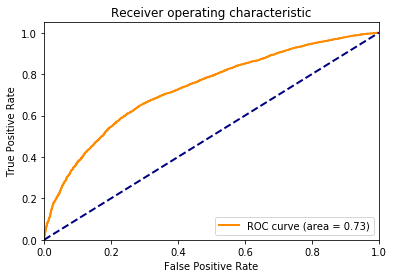

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [49]:
h = int(len(x_test)/2)

user = pd.DataFrame(x_test.iloc[0:15929]['user_id'])
user['y_pred'] = y_predicted
user['y_test'] = y_test
user = user.sort_values(by=['user_id'])

user_f = user.iloc[:h]
user_s = user.iloc[h:]

7964

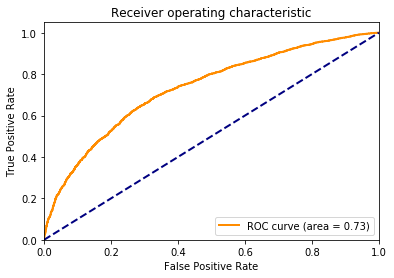

In [48]:
fpr, tpr, _ = roc_curve(user_f['y_test'], user_f['y_pred'])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

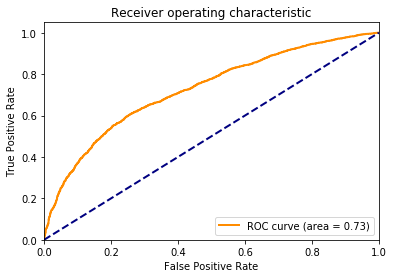

In [52]:
fpr, tpr, _ = roc_curve(user_s['y_test'], user_s['y_pred'])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

-----

In [9]:
import pandas as pd
import model_lgbm as mlgbm

path_to_train = './data/features/fat_train.csv'
path_to_test = './data/features/fat_test.csv'
path_to_sample = './data/sample_submission_kaggle.csv'
path_to_submission = './data/submission2.csv'

train = pd.read_csv(path_to_train, encoding='utf-8')
test = pd.read_csv(path_to_test, encoding='utf-8')

fs, pred, model = mlgbm.create_submission(train, test, path_to_sample, params, cols, path_to_submission, iterations=1000)

In [10]:
mlgbm.feature_score(fs, cols)

[('context_type', 1682),
 ('song_listened', 1533),
 ('context_type_cumulative_mean', 1361),
 ('ts_listen_hour_cumulative_mean', 1253),
 ('user_id', 1205),
 ('media_duration', 1183),
 ('ts_listen_dayofweek_cumulative_mean', 1072),
 ('platform_name_cumulative_mean', 1026),
 ('listen_type_cumulative_mean', 939),
 ('ExplicitLyrics_cumulative_mean', 803),
 ('release_date_year_cumulative_mean', 734),
 ('album_id_cumulative_mean', 726),
 ('genre_id_cumulative_mean', 720),
 ('release_date_decade_cumulative_mean', 713),
 ('Isrc_Country_cumulative_mean', 691),
 ('artist_id_cumulative_mean', 685),
 ('cumsum_is_listened_1', 654),
 ('bpm_min', 626),
 ('media_duration_min', 617),
 ('media_duration_std', 591),
 ('media_duration_max', 585),
 ('Isrc_Label_cumulative_mean', 579),
 ('bpm_std', 565),
 ('bpm_max', 563),
 ('gain_std', 559),
 ('gain_min', 546),
 ('gain_max', 546),
 ('rank_std', 535),
 ('media_duration_mean', 526),
 ('rank_mean', 516),
 ('rank_max', 506),
 ('rank_min', 499),
 ('bpm_mean', 488

In [11]:
path_to_submission_correlation = './data/vitalik_submission.csv'
previous_submission = pd.read_csv(path_to_submission_correlation, encoding='utf-8')['is_listened']

from scipy.stats.stats import pearsonr
pearsonr(pred,previous_submission)

(0.61458974417470558, 0.0)

In [13]:
path_to_submission_correlation = './data/submission.csv'
previous_submission = pd.read_csv(path_to_submission_correlation, encoding='utf-8')['is_listened']

from scipy.stats.stats import pearsonr
pearsonr(pred,previous_submission)

(0.9344586787287571, 0.0)